In [ ]:
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
!pip install kraken
# Imports:
!pip install pytesseract
!sudo apt install tesseract-ocr

     |████████████████████████████████| 645kB 9.2MB/s eta 0:00:01
     |████████████████████████████████| 3.4MB 18.3MB/s 
  Created wheel for attr: filename=attr-0.3.1-cp36-none-any.whl size=2459 sha256=d77864157632de057c6fa4c14255e47c3658ce8b0f04bed2f86672af32544196
  Stored in directory: /root/.cache/pip/wheels/f0/96/9b/1f8892a707d17095b5a6eab0275da9d39e68e03a26aee2e726
Successfully built attr
  Created wheel for pytesseract: filename=pytesseract-0.3.7-py2.py3-none-any.whl size=13945 sha256=c43e350117a3c1e77d6910ce853412969df69afe19f734a16eb96aad480d9fe4
  Stored in directory: /root/.cache/pip/wheels/81/20/7e/1dd0daad1575d5260916bb1e9781246430647adaef4b3ca3b3
Successfully built pytesseract
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 

# New section

In [ ]:
!kraken list

Retrieving model list ..[32✓
10.5281/zenodo.2577813 (pytorch) - A generalized model for English printed text


In [ ]:
6  # @title Example form fields
# @markdown Forms support many types of fields.

no_type_checking = ""  # @param
string_type = "example"  # @param {type: "string"}
slider_value = 142  # @param {type: "slider", min: 100, max: 200}
number = 102  # @param {type: "number"}
date = "2010-11-05"  # @param {type: "date"}
pick_me = "thursday"  # @param ['monday', 'tuesday', 'wednesday', 'thursday']
select_or_input = (
    "apples"  # @param ["apples", "bananas", "oranges"] {allow-input: true}
)
# @markdown ---

In [ ]:
#######################################################################
# Understand the Functions in Kraken
#######################################################################

In [ ]:
import kraken

help(kraken)

Help on package kraken:

NAME
    kraken - entry point for kraken functionality

PACKAGE CONTENTS
    binarization
    ketos
    kraken
    lib (package)
    linegen
    pageseg
    repo
    rpred
    serialization
    transcribe

DATA
    absolute_import = _Feature((2, 5, 0, 'alpha', 1), (3, 0, 0, 'alpha', 0...
    division = _Feature((2, 2, 0, 'alpha', 2), (3, 0, 0, 'alpha', 0), 8192...
    print_function = _Feature((2, 6, 0, 'alpha', 2), (3, 0, 0, 'alpha', 0)...

FILE
    /usr/local/lib/python3.6/dist-packages/kraken/__init__.py




In [ ]:
#######################################################################
# Need to Segment the page to Understand the Line and further words in those lines
#######################################################################

In [ ]:
from kraken import pageseg

help(pageseg)

Help on module kraken.pageseg in kraken:

NAME
    kraken.pageseg

DESCRIPTION
    kraken.pageseg
    ~~~~~~~~~~~~~~
    
    Layout analysis and script detection methods.

FUNCTIONS
    detect_scripts(im, bounds, model='/usr/local/lib/python3.6/dist-packages/kraken/script.mlmodel', valid_scripts=None)
        Detects scripts in a segmented page.
        
        Classifies lines returned by the page segmenter into runs of scripts/writing systems.
        
        Args:
            im (PIL.Image): A bi-level page of mode '1' or 'L'
            bounds (dict): A dictionary containing a 'boxes' entry with a list of
                           coordinates (x0, y0, x1, y1) of a text line in the image
                           and an entry 'text_direction' containing
                           'horizontal-lr/rl/vertical-lr/rl'.
            model (str): Location of the script classification model or None for default.
            valid_scripts (list): List of valid scripts.
        
        Re

In [ ]:
import time
from google.colab import files


def show_boxes(img, fnm):
    # Lets bring in our ImageDraw object
    from PIL import ImageDraw

    # And grab a drawing object to annotate that image
    drawing_object = ImageDraw.Draw(img)
    # time.sleep(1)
    # We can create a set of boxes using pageseg.segment
    bounding_boxes = pageseg.segment(img.convert("1"))["boxes"]
    dir = "/content/drive/MyDrive/Subex/Subex Hackathon Dataset/" + fnm + "_bin.txt"
    # print(dir)
    with open(dir, "w") as f:
        f.write(str(bounding_boxes))
    for box in bounding_boxes:
        # An just draw a nice rectangle
        drawing_object.rectangle(box, fill=None, width=4, outline="red")
        with open(dir, "a") as f:
            f.write(str(box) + "\n")
    # And to make it easy, lets return the image object
    # return img
    # time.sleep(1)
    img.save("/content/drive/MyDrive/Subex/Subex Hackathon Dataset/" + fnm + "_bin.jpg")
    print(fnm + " done...")
    img = None
    fnm = ""

In [ ]:
import glob

glob.glob(path)

NameError: ignored

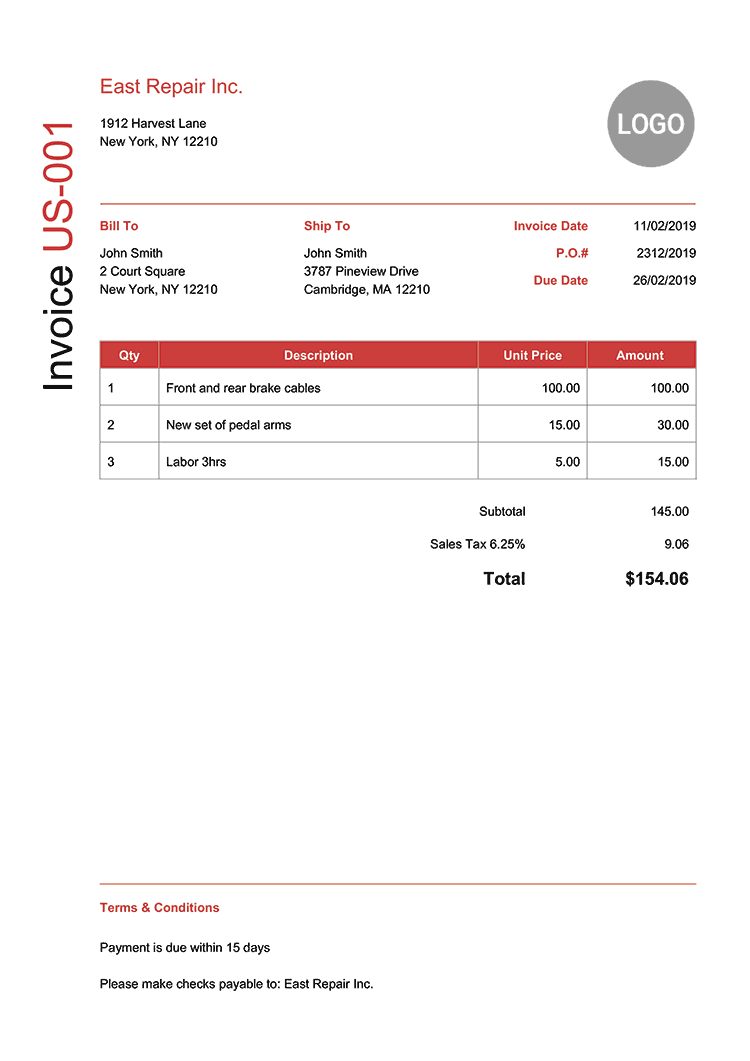

In [ ]:
img = Image.open(
    "/content/drive/MyDrive/Subex/Subex Hackathon Dataset/images/00034.PNG"
)
bounding_boxes = pageseg.segment(img.convert("1"))["boxes"]
img

In [ ]:
im_arr = np.asarray(img)
# convert rgb array to opencv's bgr format
im_arr_bgr = cv2.cvtColor(im_arr, cv2.COLOR_RGB2BGR)
# pts1 and pts2 are the upper left and bottom right coordinates of the rectangle
cv2.rectangle(im_arr_bgr, pts1, pts2, color=(0, 255, 0), thickness=3)
im_arr = cv2.cvtColor(im_arr_bgr, cv2.COLOR_BGR2RGB)
# convert back to Image object
im = Image.fromarray(im_arr)

101 79 240 97
42 118 205 135
42 136 216 152
42 152 71 160
42 164 71 174
42 174 71 191
49 194 71 212
42 207 71 222
42 221 137 240
42 240 161 258
50 266 184 286
100 284 216 295
50 287 72 306
50 318 72 328
50 328 107 344
50 339 157 367
50 360 107 371
50 371 71 379
304 221 349 233
303 248 365 258
303 266 417 276
303 284 429 297
42 383 319 393
107 420 290 432
107 457 225 467
99 903 218 912
100 942 269 955
100 979 372 991
515 221 696 231
479 506 524 516
430 539 524 549
483 572 524 585
556 248 695 258
534 275 695 285
542 383 579 393
549 420 579 430
555 457 579 467
651 383 688 393
657 420 688 430
658 457 688 467
651 506 688 516
664 539 688 549
625 571 687 586


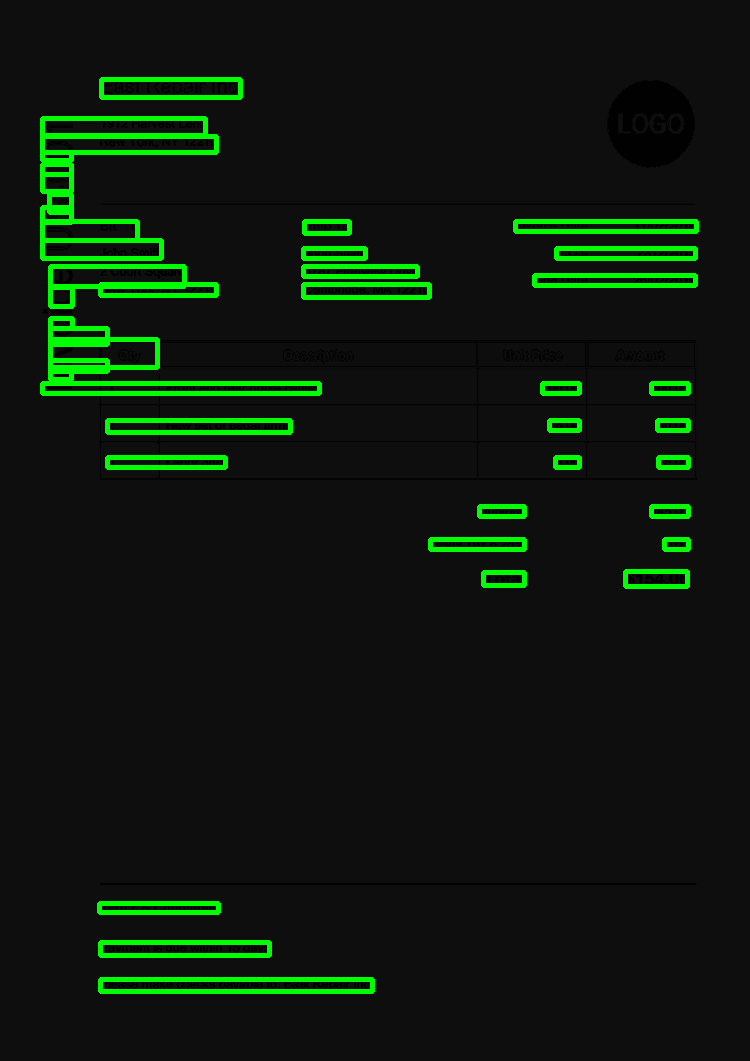

In [ ]:
import numpy as np
from PIL import ImageDraw
import cv2

drawing_object = ImageDraw.Draw(img)
for box in bounding_boxes:
    # An just draw a nice rectangle
    print(box[0], box[1], box[2], box[3])
    im_arr = np.asarray(img)
    # convert rgb array to opencv's bgr format
    im_arr_bgr = cv2.cvtColor(im_arr, cv2.COLOR_RGB2BGR)
    # pts1 and pts2 are the upper left and bottom right coordinates of the rectangle
    cv2.rectangle(
        im_arr_bgr, (box[0], box[1]), (box[2], box[3]), color=(0, 255, 0), thickness=3
    )
    im_arr = cv2.cvtColor(im_arr_bgr, cv2.COLOR_BGR2RGB)
    # convert back to Image object
    img = Image.fromarray(im_arr)


img

In [ ]:
a = pageseg.detect_scripts(img, bounding_boxes)

NotImplementedError: ignored

In [ ]:
from google.colab.patches import cv2_imshow

cv2_imshow(img)

AttributeError: ignored

In [ ]:
bounding_boxes

[[17, 18, 107, 37],
 [22, 65, 165, 77],
 [22, 100, 79, 107],
 [22, 126, 45, 133],
 [22, 152, 67, 159],
 [21, 179, 51, 186],
 [22, 205, 79, 214],
 [22, 231, 45, 238],
 [22, 277, 139, 289],
 [21, 312, 41, 319],
 [22, 338, 51, 345],
 [22, 376, 79, 385],
 [21, 403, 101, 410],
 [23, 449, 64, 461],
 [22, 485, 74, 498],
 [33, 540, 99, 549],
 [28, 565, 73, 575],
 [22, 616, 64, 628],
 [31, 651, 89, 663],
 [21, 679, 53, 689],
 [21, 706, 71, 713],
 [29, 747, 73, 754],
 [21, 775, 89, 784],
 [28, 803, 51, 810],
 [168, 126, 211, 133],
 [178, 344, 301, 353],
 [272, 647, 327, 664],
 [301, 706, 320, 713],
 [340, 126, 363, 135],
 [341, 231, 389, 238],
 [337, 647, 409, 664],
 [374, 679, 402, 686],
 [362, 706, 402, 714],
 [487, 126, 537, 135],
 [448, 481, 507, 496],
 [460, 568, 485, 575],
 [442, 647, 492, 664],
 [444, 679, 481, 687],
 [445, 706, 485, 714],
 [538, 126, 563, 133],
 [521, 481, 585, 499],
 [537, 513, 568, 520],
 [543, 568, 568, 575],
 [499, 647, 589, 664],
 [540, 679, 568, 686],
 [540, 706, 5

In [ ]:
import glob
from PIL import Image
import time

path = "/content/drive/MyDrive/Subex/Subex Hackathon Dataset/images/00006.PNG"
i = 0

for file in glob.glob(path):
    # print(file)
    fname = file[26 : len(file)]
    head, sep, tail = fname.partition(".")
    print(head)

    print(i, " Started...")
    show_boxes(Image.open(file), head)
    i = i + 1

ex/Subex Hackathon Dataset/images/00006
0  Started...


FileNotFoundError: ignored

In [ ]:
# zip the results folder
!zip -r /content/sample_data/resultbinary.zip /content/sample_data/resultss

	zip warning: name not matched: /content/sample_data/resultss

zip error: Nothing to do! (try: zip -r /content/sample_data/resultbinary.zip . -i /content/sample_data/resultss)


In [ ]:
# zip download
from google.colab import files

files.download("/content/sample_data/resultbinary.zip")

In [ ]:
# to remove the content of directory
import glob
from PIL import Image
import time
import os

path1 = "/content/sample_data/imgs/*.*"

for file in glob.glob(path1):
    # print(file)
    try:
        os.remove(file)
    except:
        print("An exception occurred")
# path2 = "/content/sample_data/resultss/*.*"
# for file1 in glob.glob(path2):
#   print(file1)
#   try:
#     os.remove(file1)
#   except:
#     print("An exception occurred")

In [ ]:
# downloading the model
!kraken get 10.5281/zenodo.1476297

In [ ]:
!kraken list

In [ ]:
from PIL import Image
from google.colab import files

Im = Image.open("test_image.jpg", mode="r")
display(Im)

In [ ]:
# ocr test
!kraken -i '/content/drive/MyDrive/Subex/Subex Hackathon Dataset/images/00001.PNG' '/content/drive/MyDrive/Subex/Subex Hackathon Dataset/images/00001.'  binarize segment

Binarizing	✓
Segmenting	✓


In [ ]:
!kraken -i '/content/drive/MyDrive/Subex/Subex Hackathon Dataset/00001.jpg' '/content/drive/MyDrive/Subex/Subex Hackathon Dataset/lines.json' segment

Usage: kraken [OPTIONS] COMMAND1 [ARGS]...
              [COMMAND2 [ARGS]...]...

Error: Invalid value: cannot identify image file '/content/drive/MyDrive/Subex/Subex Hackathon Dataset/00001.jpg'


# New Section

In [ ]:
!sudo apt-get install imagemagick imagemagick-doc

In [ ]:
!convert --version
!convert '/content/مکاسب 4 ترم اول-02.pdf' /content/page-%05d.jpg

hello worklffd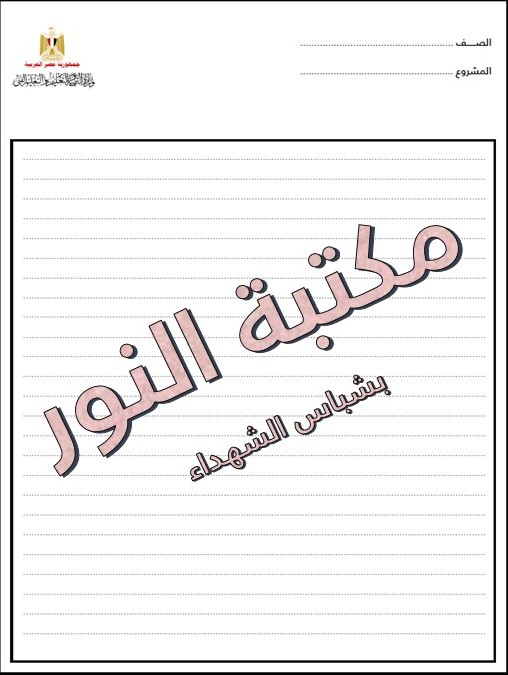

In [ ]:
!convert -verbose  -append  /content/page-*.jpg[50] /content/out-1.png

In [ ]:
!rm /content/page*

In [ ]:
!find ImageMagick
%cd /etc/ImageMagick-6
!ls

In [ ]:
! kraken get 10.5281/zenodo.2577813

Retrieving model .......................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [ ]:
img = Image.open(
    "/content/drive/MyDrive/Subex/Subex Hackathon Dataset/images/00001.PNG"
)
bounding_boxes = pageseg.segment(img.convert("1"))["boxes"]

In [ ]:
dic = pageseg.segment(img.convert("1"))

{'boxes': [[12, 4, 361, 39],
  [32, 48, 162, 88],
  [105, 79, 164, 103],
  [32, 88, 164, 149],
  [33, 144, 164, 167],
  [21, 196, 157, 211],
  [22, 221, 287, 236],
  [21, 256, 158, 271],
  [22, 305, 101, 320],
  [308, 61, 842, 88],
  [21, 340, 310, 355],
  [21, 365, 123, 379],
  [22, 389, 101, 403],
  [12, 448, 249, 485],
  [429, 4, 671, 39],
  [440, 103, 705, 118],
  [439, 126, 706, 140],
  [430, 150, 715, 165],
  [69, 522, 460, 542],
  [69, 545, 288, 558],
  [69, 568, 228, 581],
  [69, 587, 282, 600],
  [70, 608, 380, 624],
  [70, 633, 529, 652],
  [69, 657, 277, 673],
  [70, 682, 361, 700],
  [69, 706, 338, 725],
  [549, 208, 864, 223],
  [549, 256, 982, 272],
  [550, 316, 610, 331],
  [549, 364, 673, 379],
  [550, 389, 703, 403],
  [548, 413, 673, 430],
  [70, 778, 425, 797],
  [70, 792, 537, 832],
  [606, 630, 679, 658],
  [610, 655, 673, 679],
  [615, 678, 673, 710],
  [626, 703, 675, 721],
  [623, 719, 673, 761],
  [553, 759, 633, 1159],
  [21, 1173, 623, 1198],
  [39, 1207, 636

In [ ]:
scr = pageseg.detect_scripts(img, dic, model="en_best.mlmodel")

NotImplementedError: ignored

In [ ]:
def create_and_check_contours(img):

    bounding_boxes = pageseg.segment(img.convert("1"))["boxes"]
    bounding_boxes.sort(key=lambda x: x[0])
    bounding_boxes.sort(key=lambda x: x[1])
    from google.colab.patches import cv2_imshow
    import cv2
    import pytesseract

    data_list = {}
    for box in bounding_boxes:
        # An just draw a nice rectangle
        print(box[0], box[1], box[2], box[3])
        im_arr = np.asarray(img)
        # convert rgb array to opencv's bgr format
        im_arr_bgr = cv2.cvtColor(im_arr, cv2.COLOR_RGB2BGR)
        # pts1 and pts2 are the upper left and bottom right coordinates of the rectangle
        # cv2.rectangle(im_arr_bgr, (box[0], box[1]), (box[2], box[3]),
        # color=(0, 255, 0), thickness=3)
        try:

            img_crop = im_arr[box[1] : box[3], box[0] : box[2]]
            img_crop = cv2.resize(
                img_crop, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC
            )
            k = np.ones((1, 1))
            img_crop = cv2.dilate(img_crop, k, iterations=3)
            img_crop = cv2.erode(img_crop, k, iterations=3)
            img_crop = cv2.cvtColor(img_crop, cv2.COLOR_BGR2GRAY)
            _, img_crop = cv2.threshold(
                img_crop, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU
            )
            cv2_imshow(img_crop)

            data = pytesseract.image_to_string(img_crop)
            data_list[(box[0], box[1], box[2], box[3])] = data
            im_arr = cv2.cvtColor(im_arr_bgr, cv2.COLOR_BGR2RGB)
            # convert back to Image object
        except Exception as e:
            print(e)
        # img = Image.fromarray(im_arr)
    return data_list

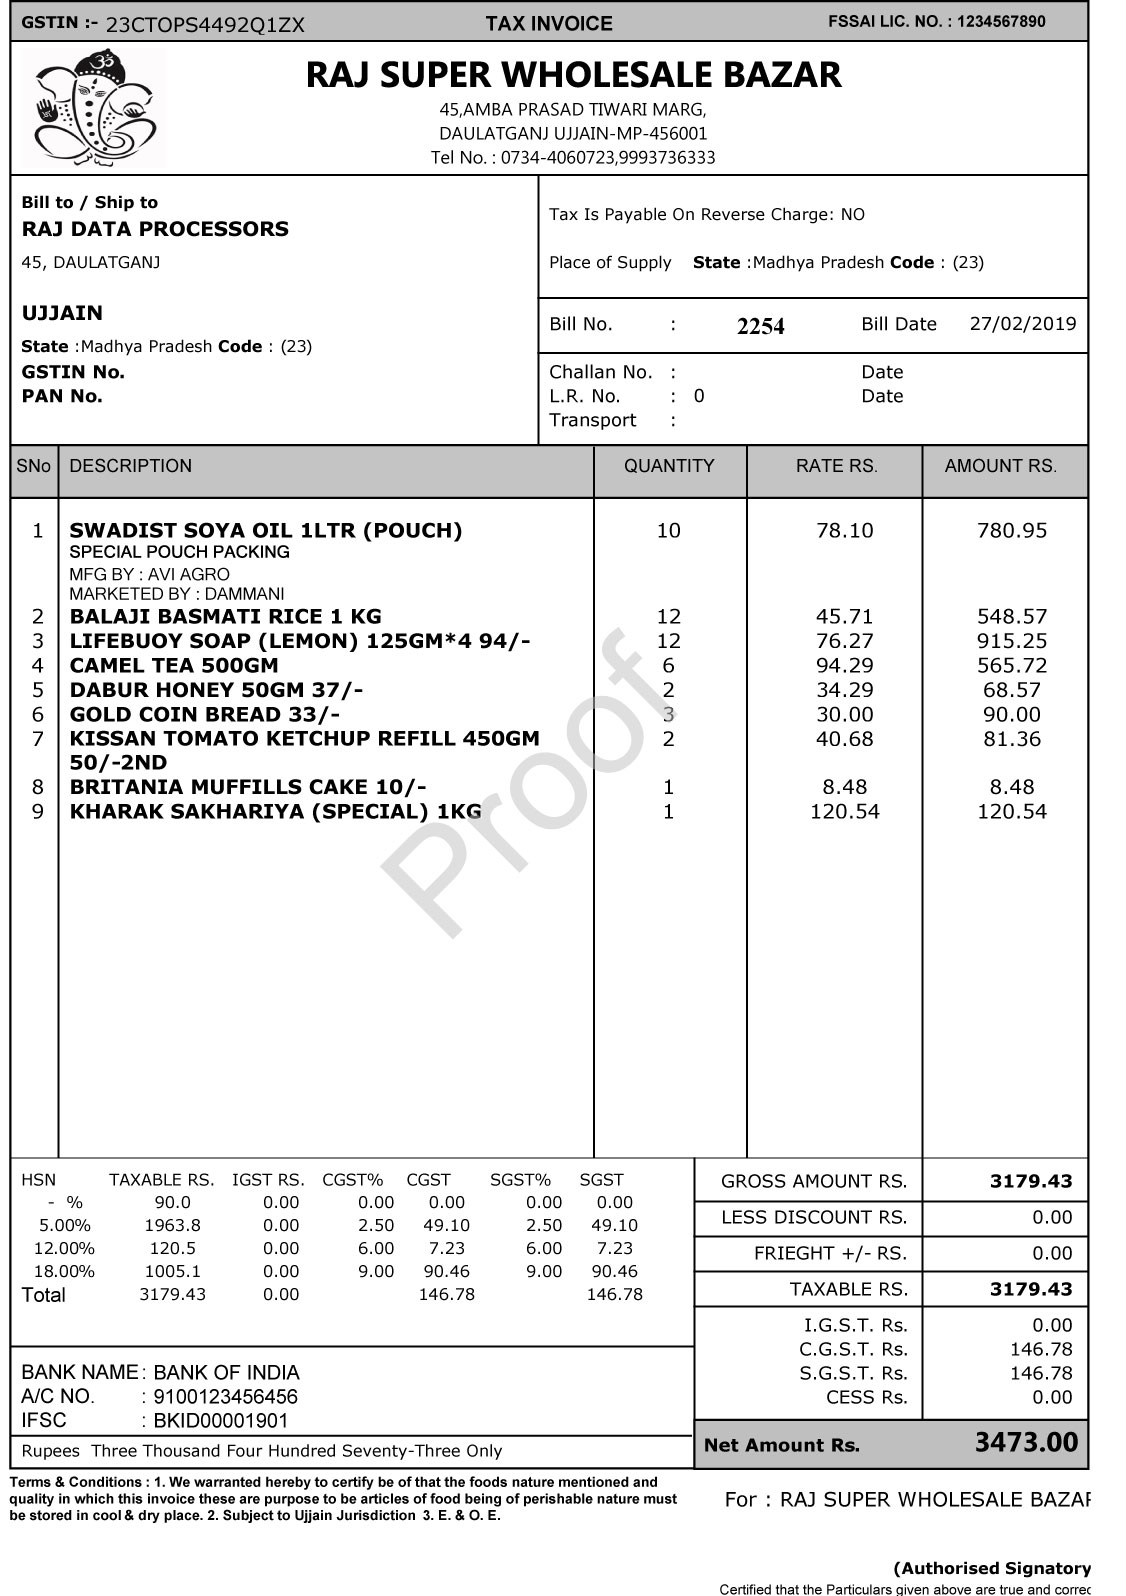

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

img_open = cv2.imread(
    "/content/drive/MyDrive/Subex/Subex Hackathon Dataset/images/00001.PNG"
)
cv2_imshow(img_open)

0 0 19 9


0 8 37 24


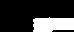

10 25 136 44


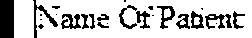

186 25 392 44


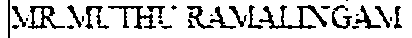

419 26 528 43


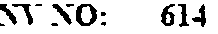

412 42 598 64


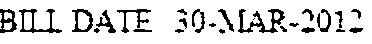

186 44 231 62


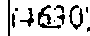

9 46 81 64


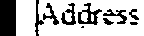

185 62 384 82


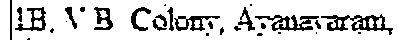

498 64 598 82


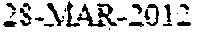

408 65 448 81


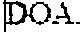

416 82 448 96


185 83 264 98


497 83 593 96


0 104 30 121


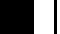

185 121 319 137


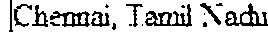

680 121 700 137


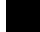

10 140 135 160


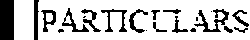

587 144 656 160


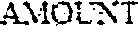

0 158 191 184


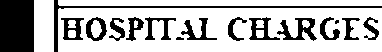

0 176 11 188


526 185 656 204


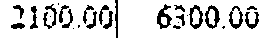

9 186 56 203


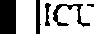

492 188 503 196


11 204 167 225


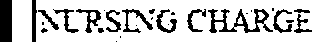

526 208 655 225


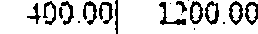

9 227 95 247


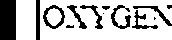

526 227 654 247


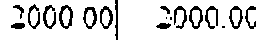

11 247 134 265


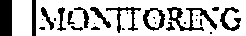

525 248 654 264


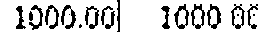

8 267 166 289


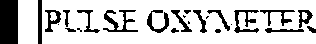

525 267 654 289


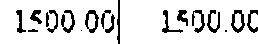

679 267 699 285


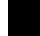

9 289 143 309


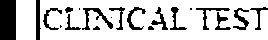

525 289 654 310


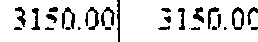

15 312 167 330


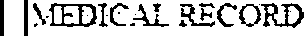

525 313 582 327


607 313 654 328


525 330 654 348


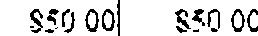

29 331 241 351


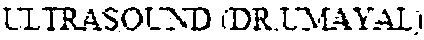

0 332 23 350


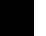

0 350 11 362


23 352 231 368


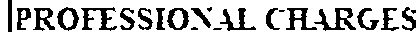

10 359 20 373


0 361 10 374


10 373 23 393


0 374 11 386


24 376 245 394


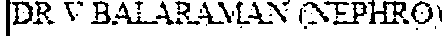

525 376 654 395


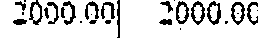

679 387 699 403


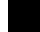

10 394 288 412


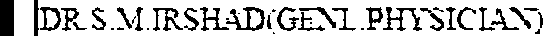

525 396 656 411


0 408 25 426


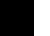

0 431 14 443


0 457 30 479


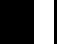

681 499 699 515


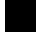

413 513 494 528


597 513 655 528


0 521 25 539


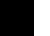

0 539 12 551


0 551 11 563


413 552 518 568


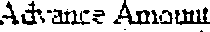

626 552 656 567


679 585 699 601


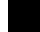

0 594 17 610


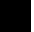

19 605 143 623


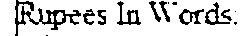

679 608 699 626


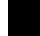

19 623 333 642


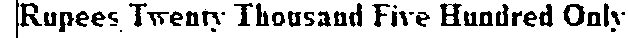

578 642 655 656


412 643 511 655


479 680 659 696


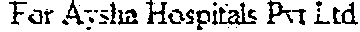

0 692 25 710


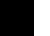

0 710 12 722


0 722 12 734


0 734 11 746


608 737 659 752


679 747 699 763


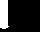

407 761 437 777


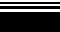

546 762 581 778


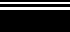

In [ ]:
from PIL import Image
import numpy as np
from kraken import pageseg

img = Image.open(
    "/content/drive/MyDrive/Subex/Subex Hackathon Dataset/images/00069.PNG"
)
d_dict = create_and_check_contours(img)

In [ ]:
d_dict

{(0, 0, 19, 9): '\x0c',
 (0, 8, 37, 24): '\x0c',
 (0, 104, 30, 121): '\x0c',
 (0, 158, 191, 184): 'HOSPITAL CHARGES\n\x0c',
 (0, 176, 11, 188): '\x0c',
 (0, 332, 23, 350): '\x0c',
 (0, 350, 11, 362): '\x0c',
 (0, 361, 10, 374): '\x0c',
 (0, 374, 11, 386): '\x0c',
 (0, 408, 25, 426): '\x0c',
 (0, 431, 14, 443): '\x0c',
 (0, 457, 30, 479): '\x0c',
 (0, 521, 25, 539): '\x0c',
 (0, 539, 12, 551): '\x0c',
 (0, 551, 11, 563): '\x0c',
 (0, 594, 17, 610): '\x0c',
 (0, 692, 25, 710): '\x0c',
 (0, 710, 12, 722): '\x0c',
 (0, 722, 12, 734): '\x0c',
 (0, 734, 11, 746): '\x0c',
 (8, 267, 166, 289): 'B |PULSE OXYMETER\n\x0c',
 (9, 46, 81, 64): 'm jAddress\n\x0c',
 (9, 186, 56, 203): '\x0c',
 (9, 227, 95, 247): 'B |ONYGEN\n\x0c',
 (9, 289, 143, 309): 'B ICLINICAL TEST\n\x0c',
 (10, 25, 136, 44): 'B (Name Ci Patient\n\x0c',
 (10, 140, 135, 160): 'B PARTICULARS\n\x0c',
 (10, 359, 20, 373): '\x0c',
 (10, 373, 23, 393): '\x0c',
 (10, 394, 288, 412): 'BS IDR. SM IRSHADIGENL PHYSICIAN)\n\x0c',
 (11, 204, 1

In [ ]:
for i in d_dict.keys():
    d_dict[i] = d_dict[i].replace("\n", "")
    d_dict[i] = d_dict[i].replace("\x0c", "")

In [ ]:
d_dict_new = {}
for i in d_dict.keys():
    if d_dict[i] != "" and d_dict[i] != " ":
        d_dict_new[i] = d_dict[i]

In [ ]:
d_dict_new

{(0, 158, 191, 184): 'HOSPITAL CHARGES',
 (8, 267, 166, 289): 'B |PULSE OXYMETER',
 (9, 46, 81, 64): 'm jAddress',
 (9, 227, 95, 247): 'B |ONYGEN',
 (9, 289, 143, 309): 'B ICLINICAL TEST',
 (10, 25, 136, 44): 'B (Name Ci Patient',
 (10, 140, 135, 160): 'B PARTICULARS',
 (10, 394, 288, 412): 'BS IDR. SM IRSHADIGENL PHYSICIAN)',
 (11, 204, 167, 225): 'f [NURSING CHARGE',
 (11, 247, 134, 265): 'a IMONTIORING',
 (15, 312, 167, 330): '| MEDICAL RECORD',
 (19, 605, 143, 623): '(Rupees In Words:',
 (19, 623, 333, 642): '[Rupees Twenty Thousand Five Hundred Only',
 (24, 376, 245, 394): '|DR V BALARANEAN CNEPHRO!',
 (29, 331, 241, 351): 'ULTRASOUND (DR.UMAYAL|',
 (185, 62, 384, 82): 'LB, VB Coton, Avanzvaram,',
 (185, 83, 264, 98): 'IChennai 11.',
 (186, 25, 392, 44): 'IMRMUTHU RAMALINGAM',
 (186, 44, 231, 62): "(4630'",
 (412, 42, 598, 64): 'BILL DATE 39-NLAR-2012',
 (412, 643, 511, 655): 'Ratance Amount',
 (413, 513, 494, 528): 'Total Armour',
 (413, 552, 518, 568): 'Advance Amoi',
 (416, 82,

In [ ]:
import pandas as pd

weights = pd.read_csv("/content/drive/MyDrive/Subex/weights.csv", index_col=0)
weights = weights.to_dict("r")
weighted = weights[0]

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:1490: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  FutureWarning,


In [ ]:
import nltk

nltk.download("punkt")
nltk.download("averaged_perceptron_tagger")
nltk.download("wordnet")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
def lexnames(word):
    """
    Returns the list of figures of speech of (word).
    Example: adj.all
    """
    from nltk.corpus import wordnet as wn

    syns = wn.synsets(str(word))
    list_lexnames = []
    for syn in syns:
        if syn.lexname() not in list_lexnames:
            list_lexnames.append(syn.lexname())
    return list_lexnames

In [ ]:
def find_weighted_sum(sentence):
    result = []
    lexical_list = {}
    j = sentence.split()
    fos = {}
    for k in j:
        result = lexnames(k)
        result_list.append(result)
        for word in result:
            if word not in fos:
                fos[word] = 1
            else:
                fos[word] += 1
        try:
            if k[0] is "$" or float(k) or int(k):
                if "noun.quantity" not in fos:  # Appending noun.quantity for numerals;
                    # Since lexnames does not do so sometimes
                    fos["noun.quantity"] = 1
                else:
                    fos["noun.quantity"] += 1
        except:
            continue
            # print(f"{k} is not a numeral")
    lexical_list[sentence] = fos
    weighted_sum = 0
    for i in lexical_list.keys():
        for j in lexical_list[i].keys():
            # print(j)
            if j in weighted.keys():
                # print(f"Weight for {j} found!")
                weighted_sum += weighted[j] * lexical_list[i][j]
            else:
                continue
                # print(f"Weight for {j} not found!")
    return weighted_sum, result

In [ ]:
result_list = []
sentence_dict = {}
cumulative_score = 0
for i in d_dict.keys():
    sentence_dict[d_dict[i].lower()], result_idx = find_weighted_sum(d_dict[i].lower())
    result_list.append(result_idx)
    if sentence_dict[d_dict[i].lower()] >= 50:
        cumulative_score += 1

In [ ]:
sentence_dict

{'': 0,
 '(authorised signatory': 6.382978723404255,
 '12': 29.787234042553187,
 '3473.00': 10.638297872340424,
 '5 00% 1963.8 0.00 2750 49.10 2750 449:.1c': 72.34042553191489,
 '50/-2nd': 0,
 '9954bill date27/02/2019': 0,
 'a/c no.': 10.638297872340424,
 'bank name: bank of india': 64.89361702127658,
 'be stored in cool & dry place. 2. subject to ujjain jurisdiction 3.e.& o.e': 113.82978723404254,
 'camel tea 500gm': 7.446808510638298,
 'daulatganj ujjain-mp-45': 0,
 'fssai lic. no. : 1234567890': 21.276595744680847,
 'gold coin bread 33/-': 20.212765957446805,
 'gstin :- 23ctops4492q12zx': 0,
 'hsn taxable rs. [gst rs. cgst% cgst sgst% sgst': 8.51063829787234,
 'kharak sakhariya (special) 1kg': 0,
 'kissan tomato ketchup refill 450gm': 11.702127659574465,
 'less discount rs.': 24.46808510638298,
 'lifebuoy soap (lemon) 125gm*4 94/-': 13.829787234042552,
 'marketed by : damman': 5.319148936170213,
 'mfg by: avia!': 0,
 'net amount rs.': 35.106382978723396,
 'place of supply state :mad

In [ ]:
sentences_items = [
    "Heart-shaped Red Pillow $500 6.9%",
    "Guitar + Strings Blue Bass $77.88",
    "A collection: harry potter, 600.88Rs",
    "Breath mints $1.50",
    "Three-in-one Sock Collection $69.00",
    "Valentines day Singles Collection $555.69",
    "Levis Classic Polo $666.66",
    "Attack on Titan DVD Collection $898",
    "1 Night Stand $220",
    "Lays Chips Classic Salted $0.99",
    "5 00% 1963.8 0.00 250 49.10 250 £449.10",
    "camel tea 500gm",
    "dabur honey 50gm 3/7/-",
    "gold coin bread 33/-",
    "ketchup refill 450gm ",
    "kharak sakhariya (special) 1kg ",
    "lifebuoy soap (lemon) 125gm*4 94/-",
]
sentences_non_items = [
    "3B Orchard Court, 123 Chamiers Road",
    "21 Dr Natesan Road, Ashok Nagar Chennai",
    "IIT Madras Chennai",
    "thiruvanmiyur chennai 696969",
    "Call me @72727777",
    "Your invoice is printed below",
    "Taxes: 18% GST, 22% Modi ki kamai",
    "E-mail address: kfc@india.in",
    "Electronic City, Bangalore",
    "Contact us for free delivery @ 1234-5678",
    "be stored in cool & dry place. 2. subject to ujjai",
    "(authorised signatory",
    "45, amba prasad tiwari marg",
    "a/c no.",
    "gsti! 23ctops4492q1zx",
    "hsn taxable rs. 1gst rs. cgst% cgst sgst% sgst ",
    "less discount rs.",
    "marketed by : damman",
    "net amount rs.",
    "piace ofsupply",
    "quantity | rate rs. amount rs.",
    "ra] data processors",
    "raj super wholesale bazar",
    "rupeesthree thousand four hundred seventy-three only",
    "sno | description",
    "tax invoice",
    "terms & conditions : 1. we warranted hereby to certify be of that the foods nature mentioned and",
]

In [ ]:
lex_list_items = {}
lex_list_nitems = {}


def fos_creation(sentences_list):
    lex_dict = {}
    for i in sentences_list:
        j = i.split()
        for k in j:
            result = lexnames(k)
            for fos in result:
                if fos not in lex_dict:
                    lex_dict[fos] = 1
                else:
                    lex_dict[fos] += 1
                try:
                    if k.startswith("$"):
                        if float(k[1:]) or int(k[1:]):
                            if "noun.quantity" not in lex_dict:
                                lex_dict["noun.quantity"] = 10
                            else:
                                lex_dict["noun.quantity"] += 10
                    if float(k) or (int(k)):
                        if "noun.quantity" not in lex_dict:
                            lex_dict["noun.quantity"] = 10
                        else:
                            lex_dict["noun.quantity"] += 10
                except:
                    print(f"{k} is not a numeral")
    return lex_dict

In [ ]:
lex_list_items = fos_creation(sentences_items)
lex_list_nitems = fos_creation(sentences_non_items)

Heart-shaped is not a numeral
Red is not a numeral
Red is not a numeral
Red is not a numeral
Red is not a numeral
Red is not a numeral
Pillow is not a numeral
Pillow is not a numeral
Guitar is not a numeral
Strings is not a numeral
Strings is not a numeral
Strings is not a numeral
Strings is not a numeral
Strings is not a numeral
Strings is not a numeral
Strings is not a numeral
Strings is not a numeral
Blue is not a numeral
Blue is not a numeral
Blue is not a numeral
Blue is not a numeral
Blue is not a numeral
Blue is not a numeral
Blue is not a numeral
Blue is not a numeral
Bass is not a numeral
Bass is not a numeral
Bass is not a numeral
Bass is not a numeral
Bass is not a numeral
Bass is not a numeral
Bass is not a numeral
A is not a numeral
A is not a numeral
A is not a numeral
A is not a numeral
harry is not a numeral
harry is not a numeral
Breath is not a numeral
Breath is not a numeral
Breath is not a numeral
Breath is not a numeral
Breath is not a numeral
mints is not a numera

In [ ]:
lex_list_items

{'adj.all': 9,
 'adv.all': 1,
 'noun.act': 9,
 'noun.animal': 2,
 'noun.artifact': 13,
 'noun.attribute': 4,
 'noun.body': 1,
 'noun.cognition': 1,
 'noun.communication': 11,
 'noun.event': 1,
 'noun.food': 3,
 'noun.group': 6,
 'noun.location': 1,
 'noun.object': 5,
 'noun.person': 10,
 'noun.phenomenon': 1,
 'noun.plant': 1,
 'noun.possession': 1,
 'noun.process': 1,
 'noun.quantity': 24,
 'noun.state': 3,
 'noun.substance': 4,
 'noun.time': 3,
 'verb.body': 1,
 'verb.change': 5,
 'verb.cognition': 1,
 'verb.communication': 1,
 'verb.competition': 2,
 'verb.contact': 8,
 'verb.creation': 2,
 'verb.emotion': 1,
 'verb.motion': 1,
 'verb.perception': 1,
 'verb.possession': 1,
 'verb.stative': 1}

In [ ]:
weighted = lex_list_items
w = pd.DataFrame(weights, index=np.arange(1))
w.to_csv("/content/drive/MyDrive/Subex/weights.csv")